In [1]:
!git clone https://github.com/alimagadovk/MITW_Hack

Cloning into 'MITW_Hack'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 15 (delta 1), reused 15 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [2]:
% cd MITW_Hack

/content/MITW_Hack


In [3]:
import pandas as pd
import numpy as np
import random
import torch
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [68]:
mentee_data = pd.read_excel("Mentee-mentor.xlsx", sheet_name=0) # Считываем данные для Mentee
mentee_data[:3]

,Ф.И.О. ментора,Ф.И.О. менти,Грейд менти,Должность менти,Возраст менти,МРФ / КЦ менти,Функция менти,Полный путь менти,Проф. интересы,Личные интересы,Желаемая функция,Запрос на работу
0,NaN,NaN,3.0,Ведущий инженер,30.0,Группирующий узел Юг,Блок технической инфраструктуры,Группирующий узел Юг \ Краснодарский филиал \ ...,"Радиотехника, электромеханика, промышленная ав...","Программирование, проектное управление",Блок технической инфраструктуры,Управленческие навыки
1,NaN,NaN,3.0,Инженер 1 категории,25.0,Группирующий узел Центр,Блок технической инфраструктуры,Группирующий узел Центр \ Макрорегиональный фи...,Моделирование,"Программирование, Python",Блок информационных технологий,"Программирование, Python"
2,NaN,NaN,3.0,Тренер,30.0,Группирующий узел УРАЛ,Блок организационного развития и управления п...,NaN,"Управленческие навыки, анализ данных, проектно...","Программирование, журналистика",Блок организационного развития и управления п...,Программирование


In [69]:
mentor_data = pd.read_excel("Mentee-mentor.xlsx", sheet_name=1) # Считываем данные для Mentor
mentor_data[:3]

,Ф.И.О. ментора,Грейд ментора,Должность ментора,МРФ/КЦ ментора,Возраст ментора,Функция ментора,Полный путь ментора,Проф. интересы,Личные интересы
0,NaN,7,Заместитель директора офиса,Группирующий узел Юг,51,Массовый сегмент,Группирующий узел Юг \ Макрорегиональный филиа...,"Управление проектами, управление продуктами","Управленческие навыки, формирование команды"
1,NaN,7,Директор проектов,Корпоративный центр,31,Массовый сегмент,Корпоративный центр \ Блок Первого Вице-Презид...,"Управление проектами, управление продуктами","Управленческие навыки, мотивация команды, публ..."
2,NaN,8,Заместитель директора филиала - Директор по ра...,Группирующий узел Волга,35,Корпоративный и государственный сегменты,Группирующий узел Волга \ Пензенский филиал \ ...,"Продажи, B2B, B2G, развитие бизнеса","Управленческие навыки, формирование команды, а..."


In [70]:
mentee_list = ["Проф. интересы", "Личные интересы", "Желаемая функция", "Запрос на работу", "Грейд менти", "Возраст менти"] # Отбираем только те данные, на основе которых проводится анализ
mentor_list = ["Проф. интересы", "Личные интересы", "Функция ментора", "Грейд ментора", "Возраст ментора"]

mentee_data = mentee_data[mentee_list]
mentor_data = mentor_data[mentor_list]

mentee_data = mentee_data.dropna()
mentor_data = mentor_data.dropna()

In [7]:
mentee_data[:]

,Проф. интересы,Личные интересы,Желаемая функция,Запрос на работу,Грейд менти,Возраст менти
0,"Радиотехника, электромеханика, промышленная ав...","Программирование, проектное управление",Блок технической инфраструктуры,Управленческие навыки,3.0,30.0
1,Моделирование,"Программирование, Python",Блок информационных технологий,"Программирование, Python",3.0,25.0
2,"Управленческие навыки, анализ данных, проектно...","Программирование, журналистика",Блок организационного развития и управления п...,Программирование,3.0,30.0
3,"Управление проектами, управление продуктами, п...",Маркетинг,Массовый сегмент,Маркетинг,6.0,28.0
4,"Программирование, коммуникация",Оптика,Блок информационных технологий,Тайм-менеджмент,4.0,34.0
5,"Базы данных, SQL",Анализ данных,Корпоративный и государственный сегменты,"Базы данных, SQL",3.0,35.0
6,"Программирование, Python",Анализ данных,Блок информационных технологий,"Программирование, Python",3.0,25.0
7,"Продажи, B2B",Стратегическое мышление,Корпоративный и государственный сегменты,Управленческие навыки,4.0,33.0
8,"Телеком, продажи, B2C",Нетворкинг,Массовый сегмент,"Нетворкинг, управленческие навыки, телеком",6.0,33.0
9,"Техническая поддержка, телеком",Коммуникация,Блок технической инфраструктуры,"Нетворкинг, телеком",2.0,25.0


In [71]:
mentor_data[:]

,Проф. интересы,Личные интересы,Функция ментора,Грейд ментора,Возраст ментора
0,"Управление проектами, управление продуктами","Управленческие навыки, формирование команды",Массовый сегмент,7,51
1,"Управление проектами, управление продуктами","Управленческие навыки, мотивация команды, публ...",Массовый сегмент,7,31
2,"Продажи, B2B, B2G, развитие бизнеса","Управленческие навыки, формирование команды, а...",Корпоративный и государственный сегменты,8,35
3,"Кадровые, сфера HR, рекрутинг","Карьерное консультирование, управленческие нав...",Блок организационного развития и управления п...,7,32
4,"Радиотехника, промышленная автоматизация, элек...",Системотехника,Блок технической инфраструктуры,7,35
...,...,...,...,...,...
85,"Телеком, управление проектами","Карьерное консультирование, стратегическое мыш...","Блок экономики, финансов и стратегии",7,49
86,"Обучение персонала, кадровые, HR-сфера, рекрутинг","Коучинг, карьерное консультирование",Блок организационного развития и управления п...,7,45
87,"Коммуникация, продажи, B2B",Управленческие навыки,Корпоративный и государственный сегменты,7,39
88,"B20, управление проектами, архитектура ПО","Управленческие навыки, карьерное консультирование",Блок межоператорского взаимодействия,7,36


In [72]:
# Очистка и обработка данных
def del_space_sort(l):
  return sorted([ x.replace(' ', '') for x in l])

mentee_data["Проф. интересы"] = mentee_data["Проф. интересы"].str.lower().str.split(", ")
mentee_data["Проф. интересы"] = mentee_data["Проф. интересы"].map(del_space_sort)

mentee_data["Личные интересы"] = mentee_data["Личные интересы"].str.lower().str.split(", ")
mentee_data["Личные интересы"] = mentee_data["Личные интересы"].map(del_space_sort)

mentee_data["Желаемая функция"] = mentee_data["Желаемая функция"].str.lower().str.split(", ")
mentee_data["Желаемая функция"] = mentee_data["Желаемая функция"].map(del_space_sort)

mentee_data["Запрос на работу"] = mentee_data["Запрос на работу"].str.lower().str.split(", ")
mentee_data["Запрос на работу"] = mentee_data["Запрос на работу"].map(del_space_sort)




mentor_data["Проф. интересы"] = mentor_data["Проф. интересы"].str.lower().str.split(", ")
mentor_data["Проф. интересы"] = mentor_data["Проф. интересы"].map(del_space_sort)

mentor_data["Личные интересы"] = mentor_data["Личные интересы"].str.lower().str.split(", ")
mentor_data["Личные интересы"] = mentor_data["Личные интересы"].map(del_space_sort)

mentor_data["Функция ментора"] = mentor_data["Функция ментора"].str.lower().str.split(", ")
mentor_data["Функция ментора"] = mentor_data["Функция ментора"].map(del_space_sort)

In [84]:
def my_intersection(x,y):
  z = []
  N = len(x)
  for i in range(N):
    z.append(len(x[i] & y))
  return z

def my_union(x,y):
  z = []
  N = min(len(x),len(y))
  for i in range(N):
    z.append(x[i] | y[i])
  return z

def get_data(mentee_data, mentor_data):
  train_df_list = ["Prof_int_inter", "Prof_int_mentee", "Pers_int_inter", "Pers_int_mentee", "Mentee_req", "Mentor_sum", "Func_corr", "Grade_diff", "Age_diff"]
  train_df = []
  for i in range(mentee_data.shape[0]):
    a = list(mentor_data["Проф. интересы"].map(set))
    b = set(mentee_data["Проф. интересы"][i])
    
    prof_int_inter = my_intersection(a, b)
    
    a = list(mentor_data["Личные интересы"].map(set))
    b = set(mentee_data["Личные интересы"][i])
    
    pers_int_inter = my_intersection(a, b)
    
    a = set(mentee_data["Запрос на работу"][i])
    b = list(mentor_data["Проф. интересы"].map(set))
    c = list(mentor_data["Личные интересы"].map(set))
    
    mentee_req = my_intersection(my_union(b, c), a)
    
    a = set(mentee_data["Желаемая функция"][i])
    b = list(mentor_data["Функция ментора"].map(set))
    
    func_corr = my_intersection(b, a)

    
    prof_int_mentee = len(mentee_data["Проф. интересы"][i])
    pers_int_mentee = len(mentee_data["Личные интересы"][i])
    mentor_sum = list(mentor_data["Проф. интересы"].map(lambda x: len(x)) + mentor_data["Личные интересы"].map(lambda x: len(x)))
    grade_diff = list(pd.to_numeric(mentor_data["Грейд ментора"], 'coerce') - pd.to_numeric(mentee_data["Грейд менти"][i], 'coerce'))
    grade_diff = [max(x,0) for x in grade_diff]
    
    age_diff = list(pd.to_numeric(mentor_data["Возраст ментора"], 'coerce') - pd.to_numeric(mentee_data["Возраст менти"][i], 'coerce'))
    age_diff = [max(x,0) for x in age_diff]

    data = [prof_int_inter, prof_int_mentee, pers_int_inter, pers_int_mentee, mentee_req, mentor_sum, func_corr, grade_diff, age_diff]
    d = {train_df_list[i]: data[i] for i in range(len(data))}
    train_df.append(pd.DataFrame(data = d))
    train_df[i] = train_df[i].join(pd.DataFrame({'Corresp': [0] * train_df[i].shape[0]}))
    condition = (((train_df[i]['Prof_int_inter'] > 0) | (train_df[i]['Pers_int_inter'] > 0)) & (train_df[i]['Mentee_req'] > 0)) & (train_df[i]['Func_corr'] > 0) & (train_df[i]['Grade_diff'] >= 2) & (train_df[i]['Age_diff'] >= 5)
    train_df[i]['Corresp'][condition] = 1
  return train_df

In [85]:
train_df_list = get_data(mentee_data, mentor_data)
train_df = pd.concat(train_df_list).dropna()
train_df_list = ["Prof_int_inter", "Prof_int_mentee", "Pers_int_inter", "Pers_int_mentee", "Mentee_req", "Mentor_sum", "Func_corr", "Grade_diff", "Age_diff", "Corresp"]
dataset = torch.FloatTensor(train_df[train_df_list[:-1]].values)
targets = torch.FloatTensor(train_df[train_df_list[-1]].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to b

In [86]:
S1 = dataset[:,0] / (dataset[:,1] + 0.01)
S2 = dataset[:,2] / (dataset[:,3] + 0.01)
S3 = dataset[:,4] / (dataset[:,5] + 0.01)

G = dataset[:,7]
V = 1 / (dataset[:,8] + 0.01)
X_train = torch.FloatTensor()


X_train = torch.cat((S1.reshape(S1.shape[0], 1), S2.reshape(S2.shape[0], 1), S3.reshape(S3.shape[0], 1)), -1)
X_train = torch.cat((X_train, G.reshape(G.shape[0], 1), V.reshape(V.shape[0], 1)), -1)

In [87]:
total_count = train_df.shape[0]
train_count = int(0.7 * total_count)
test_count = total_count - train_count

X_train, X_test = X_train[:train_count,:], X_train[train_count:,:]
y_train, y_test = targets[:train_count], targets[train_count:]
y_train, y_test = y_train.reshape((y_train.shape[0],1)), y_test.reshape((y_test.shape[0],1))

In [88]:
class MyNet(torch.nn.Module): # Обучаемая модель
    def __init__(self, inputSize, outputSize):
        super(MyNet, self).__init__()
        self.linear1 = torch.nn.Linear(inputSize, outputSize, bias = 'True')
        self.act1 = torch.nn.Sigmoid()

    def forward(self, X):
        X = self.linear1(X)
        X = self.act1(X)
        return X

In [89]:
learning_rate = 0.001 # Обучение
epochs = 100


def train(model, X_train, y_train, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    loss = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-4)
    #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    batch_size = 10

    test_accuracy_history = []
    test_loss_history = []

    train_accuracy_history = []
    train_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)
    
    best_loss = -1
    for epoch in range(epochs):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = model.forward(X_batch)
            
            loss_value = loss(preds, y_batch)
            #print("loss_preds =", loss(preds, y_batch))

            loss_value.backward()

            optimizer.step()
            
        test_preds = model.forward(X_test)
        current_loss = loss(test_preds, y_test).data.cpu()
        test_loss_history.append(current_loss)

        accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
        test_accuracy_history.append(accuracy)

        train_preds = model.forward(X_train)
        train_loss = loss(train_preds, y_train).data.cpu()
        train_loss_history.append(train_loss)

        accuracy = (train_preds.argmax(dim=1) == y_train).float().mean().data.cpu()
        train_accuracy_history.append(accuracy)
        
        if (current_loss < best_loss or best_loss == -1):
            torch.save(model, './best_model.pth')
            best_loss = current_loss
        
        print("epoch =", epoch,loss(test_preds, y_test), "cur_best_loss:", best_loss)
    print("best_loss =", best_loss)
    return model, test_loss_history, train_loss_history, test_accuracy_history, train_accuracy_history


model, test_losses, train_losses, acc_test, acc_tr = train(MyNet(5, 1), X_train, y_train, X_test, y_test)

epoch = 0 tensor(0.1673, grad_fn=<MseLossBackward>) cur_best_loss: tensor(0.1673)
epoch = 1 tensor(0.1472, grad_fn=<MseLossBackward>) cur_best_loss: tensor(0.1472)
epoch = 2 tensor(0.1304, grad_fn=<MseLossBackward>) cur_best_loss: tensor(0.1304)
epoch = 3 tensor(0.1165, grad_fn=<MseLossBackward>) cur_best_loss: tensor(0.1165)
epoch = 4 tensor(0.1047, grad_fn=<MseLossBackward>) cur_best_loss: tensor(0.1047)
epoch = 5 tensor(0.0948, grad_fn=<MseLossBackward>) cur_best_loss: tensor(0.0948)
epoch = 6 tensor(0.0865, grad_fn=<MseLossBackward>) cur_best_loss: tensor(0.0865)
epoch = 7 tensor(0.0793, grad_fn=<MseLossBackward>) cur_best_loss: tensor(0.0793)
epoch = 8 tensor(0.0731, grad_fn=<MseLossBackward>) cur_best_loss: tensor(0.0731)
epoch = 9 tensor(0.0678, grad_fn=<MseLossBackward>) cur_best_loss: tensor(0.0678)
epoch = 10 tensor(0.0632, grad_fn=<MseLossBackward>) cur_best_loss: tensor(0.0632)
epoch = 11 tensor(0.0593, grad_fn=<MseLossBackward>) cur_best_loss: tensor(0.0593)
epoch = 12 ten

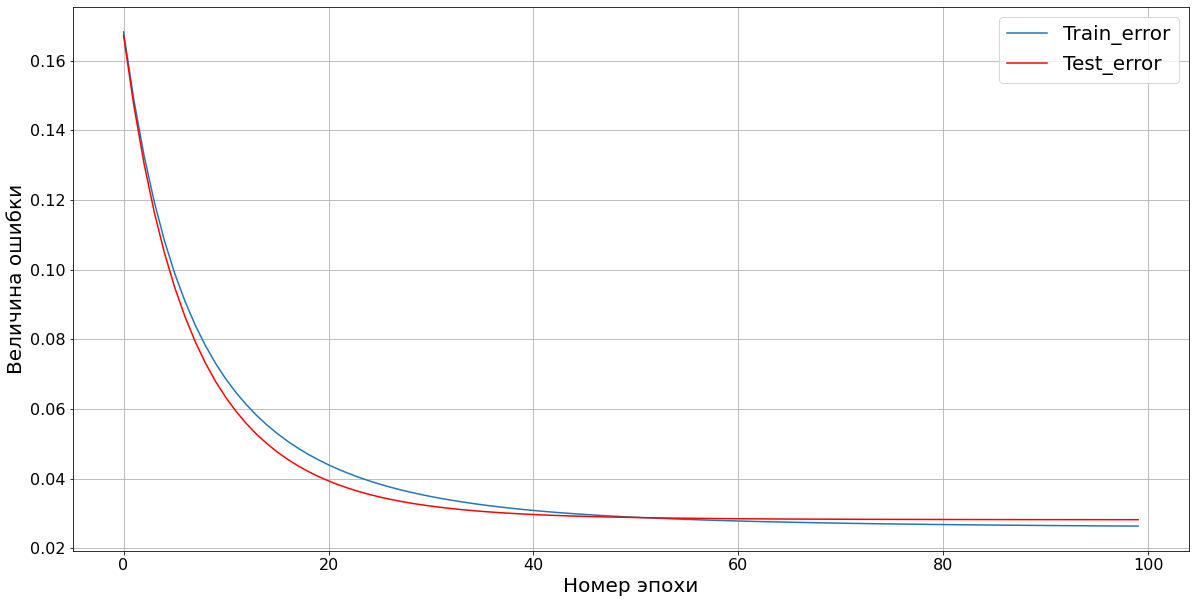

In [90]:
model = torch.load("./best_model.pth").to('cpu') # Графики ошибки

fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.plot(train_losses)
plt.plot(test_losses, 'r')
plt.grid()
plt.legend(["Train_error","Test_error"], fontsize = 20)
plt.xlabel("Номер эпохи", fontsize = 20)
plt.ylabel("Величина ошибки", fontsize = 20)

acc_test, acc_tr

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

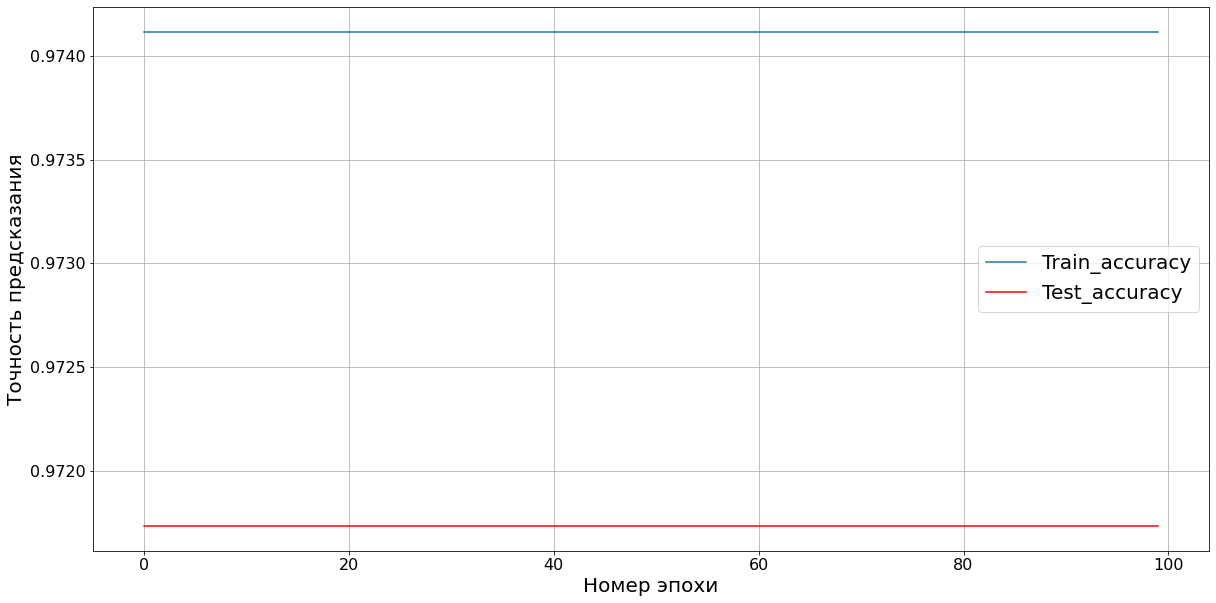

In [91]:
fig, ax = plt.subplots() # Графики точности
fig.set_figwidth(20)
fig.set_figheight(10)
plt.plot(acc_tr)
plt.plot(acc_test, 'r')
plt.grid()
plt.legend(["Train_accuracy","Test_accuracy"], fontsize = 20)
plt.xlabel("Номер эпохи", fontsize = 20)
plt.ylabel("Точность предсказания", fontsize = 20)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)